In [13]:
from pathlib import Path
import json
import pandas as pd

path = Path('../reports')

# get folders from path
folders = [x for x in path.iterdir() if x.is_dir()]

# in the folders are multiple json files. 
# Create a dataframe that contains in every row the data from the json files named "synthetic.json".

df = pd.DataFrame()
for folder in folders:
    files = [x for x in folder.iterdir() if x.is_file()]
    for file in files:
        with open(file) as json_file:
            data = json.load(json_file)
            data = {k: v for k, v in data.items() if k in ['metrics', 'data stats']}
            data = pd.json_normalize(data, meta=['metrics', 'data stats'])
            model = folder.name.split("_")[0]
            data['type'] = model + " " +('syn' if "synthetic" in file.name else "real")
            data["model"] = model
            df = df.append(data, ignore_index=True)

df


,metrics.avg rank of source,metrics.avg prediction for source,metrics.avg prediction over all nodes,metrics.min prediction over all nodes,metrics.max prediction over all nodes,metrics.avg min matching distance,metrics.avg dist to source,metrics.True positive rate,metrics.False positive rate,metrics.avg F1 score,metrics.roc score,data stats.graph stats.avg number of nodes,data stats.graph stats.avg centrality,data stats.infection stats.avg number of sources,data stats.infection stats.avg portion of infected nodes,data stats.infection stats.std portion of infected nodes,type,model
0,324.498,0.709,1.117,0.169,2.744,13.376,3.053,0.319,0.095,0.052,0.761,1000.95,0.015,15.650,0.329,0.033,GCNR syn,GCNR
1,NaN,NaN,NaN,NaN,NaN,1.849,NaN,0.064,0.047,0.064,NaN,1000.95,0.015,15.650,0.329,0.033,unsup syn,unsup
2,359.879,0.562,0.430,0.007,0.895,55.646,3.053,0.722,0.483,0.050,0.735,1000.95,0.015,15.650,0.329,0.033,GCNSI syn,GCNSI
3,347.329,0.485,0.400,0.040,0.772,12.196,3.053,0.268,0.101,0.042,0.701,1000.95,0.015,15.650,0.329,0.033,GCNSI syn,GCNSI
4,NaN,NaN,NaN,NaN,NaN,1.878,NaN,0.055,0.047,0.055,NaN,1005.99,0.015,15.555,0.326,0.037,unsup syn,unsup
5,361.693,0.852,1.123,0.150,2.574,11.058,3.053,0.275,0.094,0.048,0.681,1000.95,0.015,15.650,0.329,0.033,GCNR syn,GCNR
6,359.677,0.590,0.457,0.039,0.911,41.345,3.053,0.588,0.364,0.039,0.714,1000.95,0.015,15.650,0.329,0.033,GCNSI syn,GCNSI


In [14]:
metrics = ["avg min matching distance", "avg F1 score", "avg rank of source", "roc score"]

#normalize the column metrics.avg min matching distance with the column data stats.graph stats.avg number of nodes
df['metrics.avg min matching distance'] = df['metrics.avg min matching distance'] / df['data stats.graph stats.avg number of nodes']

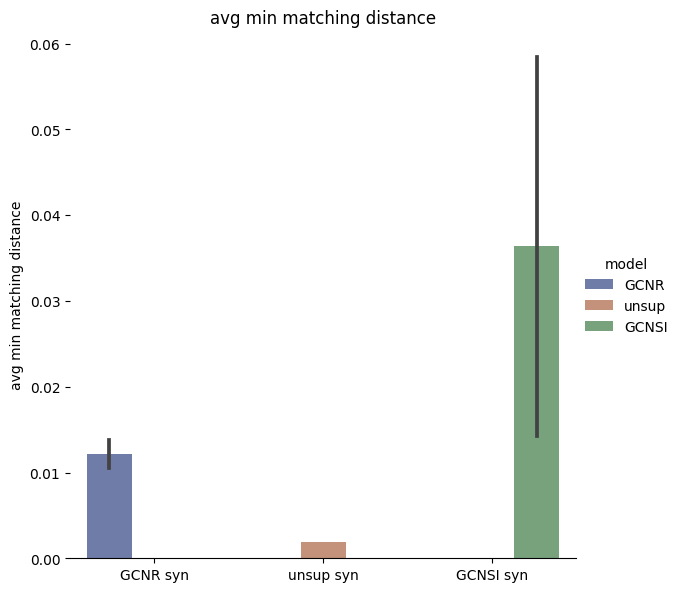

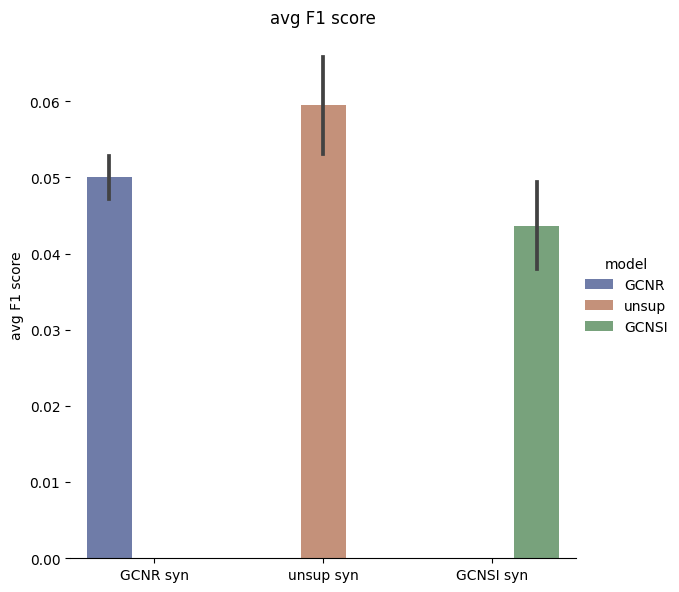

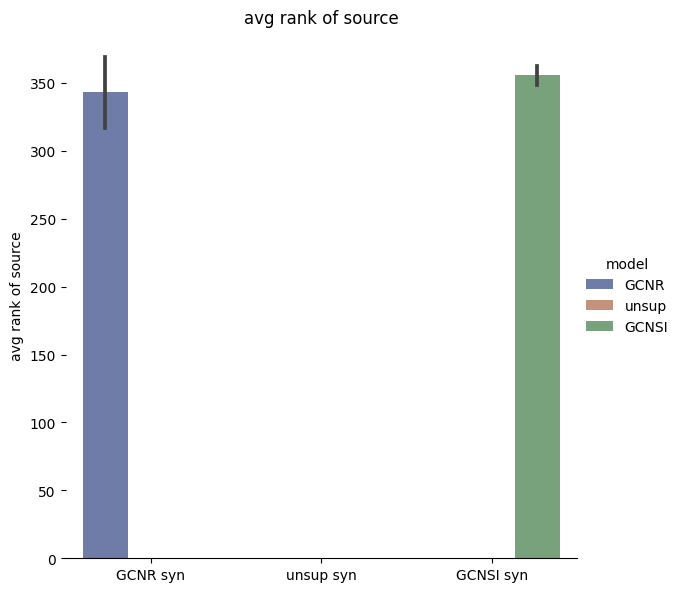

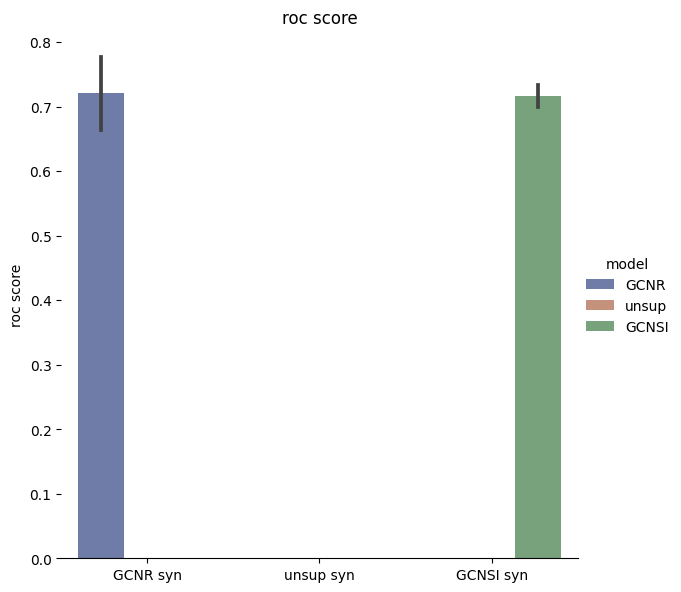

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in metrics:
    g = sns.catplot(
        data=df, kind="bar",
        x="type", y=f"metrics.{metric}", hue="model",
        errorbar="sd", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", metric)
    plt.title(f"{metric}")
    plt.show()
